In [2]:
!pip install -U vnstock

In [3]:
## Có thể gọi các class chi tiết trong thư viện thay vì sử dụng cấp cao nhất là Vnstock
from vnstock import Vnstock
from vnstock import Listing, Quote, Company, Finance, Trading, Screener


## 👋 Chào mừng bạn đến với Vnstock!

Cảm ơn bạn đã sử dụng package phân tích chứng khoán #1 tại Việt Nam

* Tài liệu: [Sổ tay hướng dẫn](https://vnstocks.com/docs/category/s%E1%BB%95-tay-h%C6%B0%E1%BB%9Bng-d%E1%BA%ABn)
* Cộng đồng: [Nhóm Facebook](https://www.facebook.com/groups/vnstock.official)

Khám phá các tính năng mới nhất và tham gia cộng đồng để nhận hỗ trợ.
                

Phiên bản Vnai 2.1.9 đã có mặt, vui lòng cập nhật với câu lệnh : `pip install vnai --upgrade`.
Lịch sử phiên bản: https://pypi.org/project/vnai/#history
Phiên bản hiện tại 2.0.4

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Danh sách mã muốn so sánh
symbols = ["VIC","VCB","FPT","HPG","PLX","MWG"]

# Khoảng thời gian (chỉnh theo ý bạn)
start = "2020-01-01"
end = "2021-12-31"


In [6]:
stock1 = Vnstock().stock(symbol=symbols[0], source='VCI')

In [7]:
stock2 = Vnstock().stock(symbol=symbols[1], source='VCI')
stock3 = Vnstock().stock(symbol=symbols[2], source='VCI')
stock4 = Vnstock().stock(symbol=symbols[3], source='VCI')
stock5 = Vnstock().stock(symbol=symbols[4], source='VCI')
stock6 = Vnstock().stock(symbol=symbols[5], source='VCI')

In [8]:
df = stock1.quote.history(start=start, end=end, interval='1D')
df

,time,open,high,low,close,volume
0,2020-01-02,102.13,102.22,101.33,102.22,440280
1,2020-01-03,102.22,102.49,101.60,102.49,248940
2,2020-01-06,102.22,102.22,101.69,101.78,301910
3,2020-01-07,101.78,102.22,101.60,101.96,183910
4,2020-01-08,101.78,101.96,100.98,101.60,468910
...,...,...,...,...,...,...
497,2021-12-27,97.00,99.00,96.50,99.00,1907500
498,2021-12-28,99.10,99.30,96.50,98.40,1737300
499,2021-12-29,98.00,98.00,95.20,95.50,2291900
500,2021-12-30,95.80,96.40,95.00,95.00,1662400


In [9]:
# Tất cả dataframe dữ liệu sẽ được gán thuộc tính tên và loại tài sản tương ứng
print(f'Mã chứng khoán: {df.name}')
print(f'Loại tài sản: {df.category}')

Mã chứng khoán: VIC
Loại tài sản: stock


In [10]:
df1 = stock2.quote.history(start=start, end=end, interval='1D')
df1

,time,open,high,low,close,volume
0,2020-01-02,38.95,39.47,38.73,39.21,386290
1,2020-01-03,39.51,39.64,38.82,38.82,536130
2,2020-01-06,38.52,38.65,37.78,37.78,880110
3,2020-01-07,37.57,37.95,36.87,37.91,1013270
4,2020-01-08,37.52,37.95,37.22,37.57,722280
...,...,...,...,...,...,...
497,2021-12-27,44.36,45.15,43.80,44.87,934100
498,2021-12-28,44.98,45.54,43.86,44.98,1168800
499,2021-12-29,44.70,44.87,44.48,44.70,440000
500,2021-12-30,44.87,44.93,43.69,44.08,920300


In [11]:
import numpy as np

def return_rate(df):
    # Tính tỉ suất sinh lời đơn giản (simple return)
    df['simple_return'] = (df['close'] / df['open'].shift(1)) - 1
    avg_simple_return = df['simple_return'].mean()
    simple_annual_return = avg_simple_return * 250 * 3  # giả định 250 ngày giao dịch / năm

    # Tính tỉ suất sinh lời logarit (log return)
    df['log_return'] = np.log(df['close'] / df['open'].shift(1))
    avg_log_return = df['log_return'].mean()
    log_annual_return = avg_log_return * 250

    return {
        'avg_simple_return': avg_simple_return,
        'simple_annual_return': simple_annual_return,
        'avg_log_return': avg_log_return,
        'log_annual_return': log_annual_return
    }

In [12]:
res = return_rate(df)
print("Kết quả cho mã:", res)

Kết quả cho mã: {'avg_simple_return': np.float64(0.0007928390459284806), 'simple_annual_return': np.float64(0.5946292844463604), 'avg_log_return': np.float64(0.0003884874452086386), 'log_annual_return': np.float64(0.09712186130215965)}


In [ ]:
df2 = stock3.quote.history(start=start, end=end, interval='1D')
df3 = stock4.quote.history(start=start, end=end, interval='1D')
df4 = stock5.quote.history(start=start, end=end, interval='1D')
df5 = stock6.quote.history(start=start, end=end, interval='1D')


In [14]:
returns = df['simple_return']

0           NaN
1      0.003525
2     -0.004304
3     -0.002544
4     -0.001769
         ...   
497    0.025907
498    0.014433
499   -0.036327
500   -0.030612
501   -0.007307
Name: simple_return, Length: 502, dtype: float64

## Tạo DataFrame giá đóng cửa cho tất cả các mã

In [15]:
# Gộp giá đóng cửa của tất cả các mã vào một DataFrame
prices = pd.DataFrame()
prices[symbols[0]] = df['close']
prices[symbols[1]] = df1['close']
prices[symbols[2]] = df2['close']
prices[symbols[3]] = df3['close']
prices[symbols[4]] = df4['close']
prices[symbols[5]] = df5['close']

# Kiểm tra dữ liệu
print(f"Shape: {prices.shape}")
print(f"\nFirst 5 rows:")
print(prices.head())
print(f"\nLast 5 rows:")
print(prices.tail())

Shape: (502, 6)

First 5 rows:
      VIC    VCB    FPT   HPG    PLX    MWG
0  102.22  39.21  21.39  8.28  45.25  36.90
1  102.49  38.82  21.03  8.33  45.73  36.37
2  101.78  37.78  20.81  8.28  45.89  36.18
3  101.96  37.91  21.21  8.17  45.25  36.46
4  101.60  37.57  20.73  8.09  44.61  35.58

Last 5 rows:
      VIC    VCB    FPT    HPG    PLX    MWG
497  99.0  44.87  48.47  26.32  47.49  64.92
498  98.4  44.98  48.47  26.26  47.23  65.35
499  95.5  44.70  48.00  26.26  47.40  64.67
500  95.0  44.08  48.00  26.20  47.40  64.63
501  95.1  44.31  47.70  26.60  47.32  65.40


## Tính Returns (Tỷ suất sinh lợi hàng ngày)

In [16]:
# Tính returns hàng ngày (tỷ lệ thay đổi giá)
returns = prices.pct_change().dropna()

print(f"Returns shape: {returns.shape}")
print(f"\nReturns statistics:")
print(returns.describe())
print(f"\nFirst 5 rows of returns:")
print(returns.head())

Returns shape: (501, 6)

Returns statistics:
              VIC         VCB         FPT         HPG         PLX         MWG
count  501.000000  501.000000  501.000000  501.000000  501.000000  501.000000
mean     0.000059    0.000419    0.001776    0.002585    0.000300    0.001391
std      0.020211    0.018683    0.018691    0.022525    0.020505    0.022244
min     -0.070006   -0.070030   -0.069767   -0.069453   -0.069597   -0.070004
25%     -0.007498   -0.008969   -0.007123   -0.008673   -0.008357   -0.008250
50%      0.000000    0.000000    0.000987    0.002067    0.000000    0.000800
75%      0.006588    0.009138    0.010500    0.013652    0.009829    0.011963
max      0.069855    0.069089    0.069922    0.069136    0.069816    0.069800

First 5 rows of returns:
        VIC       VCB       FPT       HPG       PLX       MWG
1  0.002641 -0.009946 -0.016830  0.006039  0.010608 -0.014363
2 -0.006928 -0.026790 -0.010461 -0.006002  0.003499 -0.005224
3  0.001769  0.003441  0.019222 -0.013285

## Tính ma trận Correlation

In [17]:
# Tính ma trận correlation từ returns
correlation_matrix = returns.corr()

print("Ma trận Correlation:")
print(correlation_matrix)
print(f"\n{'='*60}")
print("Giải thích:")
print("- Giá trị gần 1: Hai cổ phiếu có xu hướng biến động cùng chiều mạnh")
print("- Giá trị gần 0: Hai cổ phiếu biến động độc lập")
print("- Giá trị gần -1: Hai cổ phiếu có xu hướng biến động ngược chiều")

Ma trận Correlation:
          VIC       VCB       FPT       HPG       PLX       MWG
VIC  1.000000  0.466087  0.406874  0.381163  0.364690  0.368453
VCB  0.466087  1.000000  0.471717  0.477078  0.464505  0.465485
FPT  0.406874  0.471717  1.000000  0.632691  0.533173  0.607679
HPG  0.381163  0.477078  0.632691  1.000000  0.469366  0.514491
PLX  0.364690  0.464505  0.533173  0.469366  1.000000  0.511543
MWG  0.368453  0.465485  0.607679  0.514491  0.511543  1.000000

Giải thích:
- Giá trị gần 1: Hai cổ phiếu có xu hướng biến động cùng chiều mạnh
- Giá trị gần 0: Hai cổ phiếu biến động độc lập
- Giá trị gần -1: Hai cổ phiếu có xu hướng biến động ngược chiều


## Vẽ Heatmap Correlation

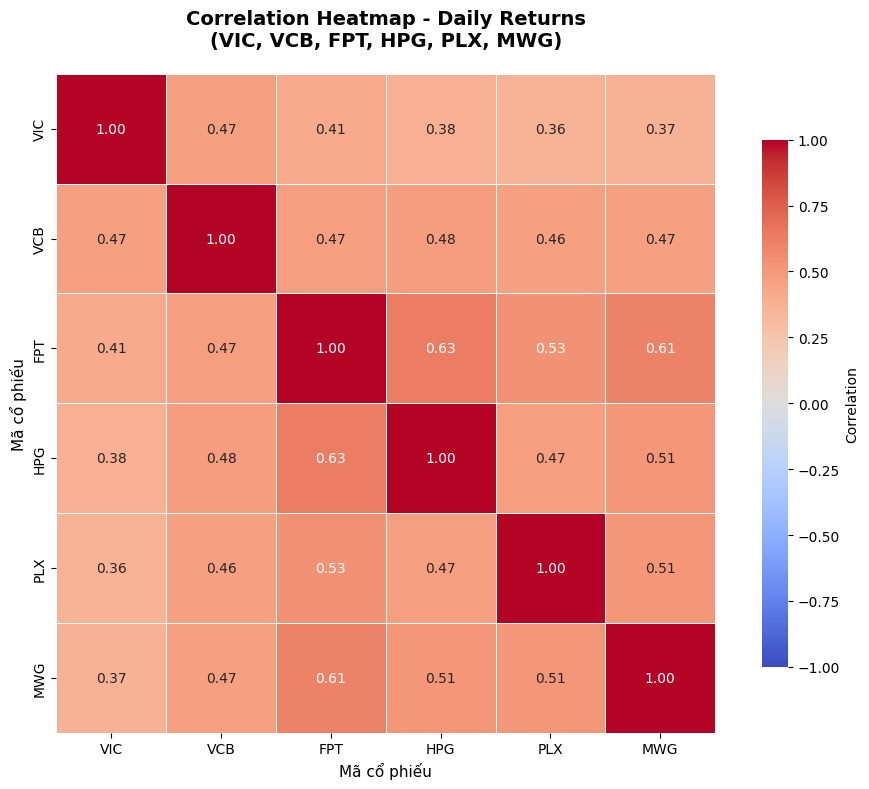


=== Top 5 cặp có correlation cao nhất ===
FPT - HPG: 0.633
HPG - FPT: 0.633
FPT - MWG: 0.608
MWG - FPT: 0.608
PLX - FPT: 0.533


In [18]:
# Vẽ heatmap correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,           # Hiển thị giá trị số
            fmt=".2f",            # Format 2 chữ số thập phân
            cmap="coolwarm",      # Bảng màu: xanh (âm) -> trắng (0) -> đỏ (dương)
            vmin=-1, vmax=1,      # Giới hạn từ -1 đến 1
            square=True,          # Ô vuông
            linewidths=0.5,       # Đường viền giữa các ô
            cbar_kws={"shrink": 0.8, "label": "Correlation"})

plt.title("Correlation Heatmap - Daily Returns\n(VIC, VCB, FPT, HPG, PLX, MWG)", 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel("Mã cổ phiếu", fontsize=11)
plt.ylabel("Mã cổ phiếu", fontsize=11)
plt.tight_layout()
plt.show()

# Hiển thị các cặp có correlation cao nhất (không tính tự correlation)
print("\n=== Top 5 cặp có correlation cao nhất ===")
corr_pairs = correlation_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs < 1]  # Loại bỏ tự correlation (=1)
top_pairs = corr_pairs.sort_values(ascending=False).head(5)
for pair, value in top_pairs.items():
    print(f"{pair[0]} - {pair[1]}: {value:.3f}")

## Phân tích bổ sung: Correlation trên giá (để so sánh)

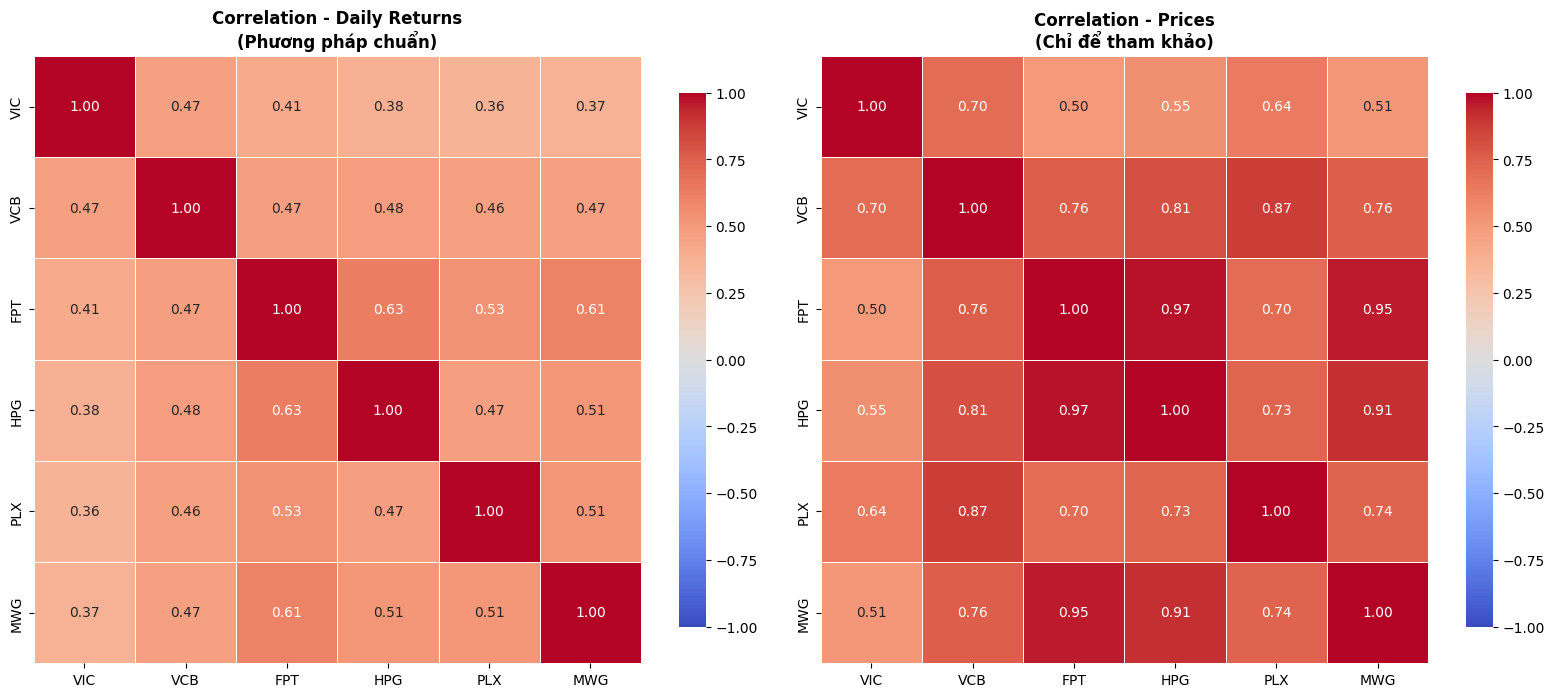

📊 Lưu ý:
- Heatmap bên TRÁI (Returns): Đo lường mối quan hệ biến động giá - CHUẨN
- Heatmap bên PHẢI (Prices): Có thể bị ảnh hưởng bởi xu hướng chung của thị trường


In [19]:
# Tính correlation trực tiếp trên giá (ít được khuyến nghị vì scale khác nhau)
price_correlation = prices.corr()

# Vẽ heatmap
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Heatmap 1: Correlation trên Returns (đúng cách)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            vmin=-1, vmax=1, square=True, linewidths=0.5, ax=ax1,
            cbar_kws={"shrink": 0.8})
ax1.set_title("Correlation - Daily Returns\n(Phương pháp chuẩn)", 
              fontsize=12, fontweight='bold')

# Heatmap 2: Correlation trên Price (để so sánh)
sns.heatmap(price_correlation, annot=True, fmt=".2f", cmap="coolwarm", 
            vmin=-1, vmax=1, square=True, linewidths=0.5, ax=ax2,
            cbar_kws={"shrink": 0.8})
ax2.set_title("Correlation - Prices\n(Chỉ để tham khảo)", 
              fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("📊 Lưu ý:")
print("- Heatmap bên TRÁI (Returns): Đo lường mối quan hệ biến động giá - CHUẨN")
print("- Heatmap bên PHẢI (Prices): Có thể bị ảnh hưởng bởi xu hướng chung của thị trường")